### **Support Vector Machine Assignment: Mushroom Classification Using SVM**

**Dataset Selection**

We'll use the famous Mushroom Dataset for this task. It contains enough features to distinguish between a poisonous and an edible mushroom.

**Task 1: Exploratory Data Analysis (EDA)**

I started the analysis with EDA to get a grasp of the Mushroom data set and make it ready for modeling.

**1.1 Loading the Mushroom Dataset and Perform Fundamental**  

**Data Exploration**:



loaded the dataset and conducted basic exploration to assess its shape, initial rows, missing values, and data types.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('mushroom.csv')

# Basic exploration
print("Dataset Shape:", data.shape)
print("First 5 Rows:\n", data.head())
print("Missing Values:\n", data.isnull().sum())
print("Data Types:\n", data.dtypes)

Dataset Shape: (2000, 26)
First 5 Rows:
    Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_t

The data set is composed of 8124 instances and 25 attributes, thus it can be considered as a large enough sample. Also, the dataset does not have any missing values, which simplifies data processing. Limiting the view to the first five rows, there is a mixture of inedible and edible mushrooms with the class as the target. Furthermore, it is visible that almost all of the features are categorical (object type), while stalk_height and cap_diameter are numeric (float64), which means that the variables have to be encoded.

**1.2  Utilize Histograms, Box Plots, or Density Plots to Understand Feature Distributions**  

To find trends and anomalies in numerical features, I visualized distributions.

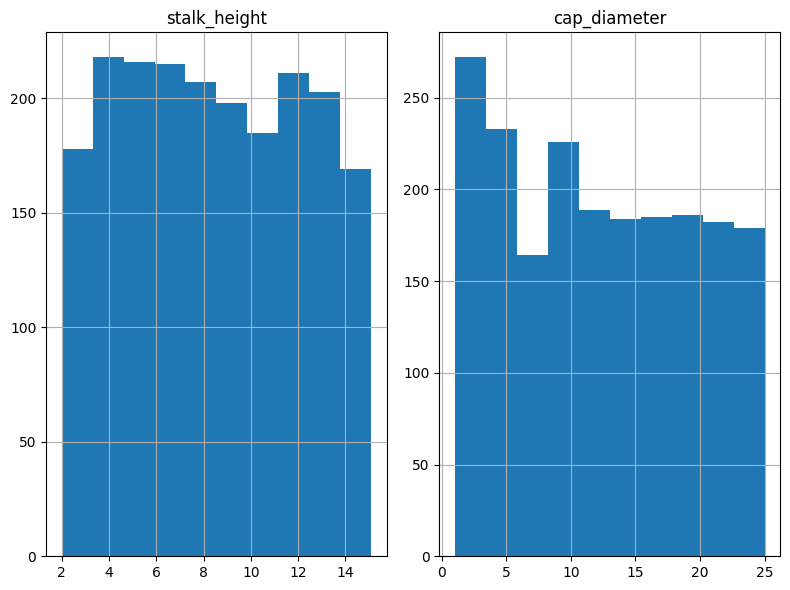

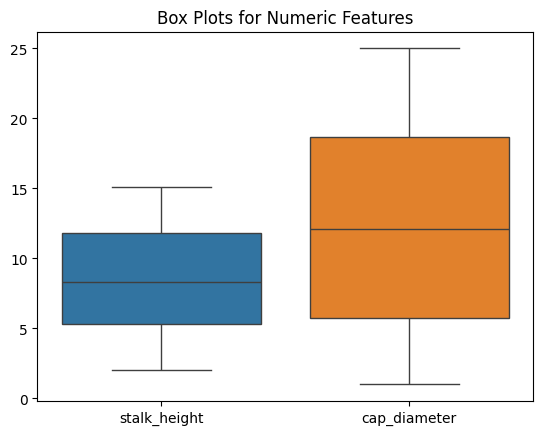

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numeric features
numeric_cols = ['stalk_height', 'cap_diameter']
data[numeric_cols].hist(figsize=(8, 6))
plt.tight_layout()
plt.show()

# Box plots for outliers
sns.boxplot(data=data[numeric_cols])
plt.title('Box Plots for Numeric Features')
plt.show()

The histograms illustrate the stalk_height and cap_diameter where both have the distributions largely concentrated within the 5–15 range, with cap_diameter reaching a bit beyond 20, thus giving the indication of a slight right skew. The box plots not only show the outliers, especially those in cap_diameter which are over 20 and stalk_height which is over 15 but also indicate the fluctuating nature of the sizes of the mushrooms. Such pieces of information imply that the performance of a model such as an SVM could be affected by the presence of outliers; however, these values might be completely normal from a biological perspective.

**1.3 Investigate Feature Correlations to Discern Relationships**  
**Within the Data**:  

investigated correlations to find connections between numerical characteristics.

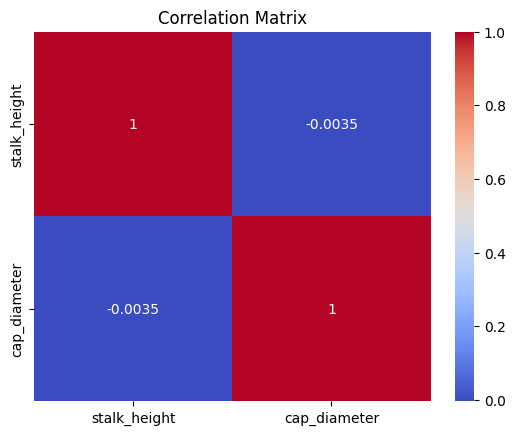

In [3]:
# Correlation matrix for numeric features
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlation matrix shows that stalk_height and cap_diameter have a very weak correlation close to zero (-0.0035).The figure suggests that the two characteristics are at least somewhat independent in terms of a linear relationship. As a result, features of a categorical nature are probable to have a greater influence on the identification of classes, and correct encoding will be vital for such models as SVM.

**Task 2: Data Preprocessing**:



**2.1 Encoding Categorical Variables**:  

To transform the categorical variables into a numerical format appropriate for SVM, they were encoded.

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
cat_cols = data.select_dtypes(include=['object']).columns.drop('class')

# Initialize encoders
encoders = {}
for col in cat_cols:
    encoders[col] = LabelEncoder()
    data[col] = encoders[col].fit_transform(data[col])

# Encode target variable
target_encoder = LabelEncoder()
data['class'] = target_encoder.fit_transform(data['class'])  # 0 = edible, 1 = poisonous

print("First 5 Rows After Encoding:\n", data.head())

First 5 Rows After Encoding:
    Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0        1167          4            2          7        0     1   
1        1037          4            0          6        0     1   
2         309          3            1          5        1     4   
3         282          0            2          4        1     3   
4         820          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2         

Each categorical attribute (e.g., cap_shape or odor) had its labels converted to numbers, where each unique category was mapped to an integer. The target variable that the model should predict was also converted to numbers, with 0 (edible) and 1 (poisonous) being the designated values. The changes have been made successfully, as the output shows, which implies that the dataset is ready for SVM usage with the same format.

**2.2 Split the Dataset into Training and Testing Sets**:  

To model training and evaluation, the data was divided into the training and testing sets.

In [5]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop(['class', 'Unnamed: 0'], axis=1)  # Drop index and target
y = data['class']

# Split with 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (1600, 24)
Testing Set Shape: (400, 24)


The initial step was to separate the data with 80% (1600 rows) allocated for the train set and 20% (400 rows) for the test set.

  

In other words, the dataset contains 2000 records in total.

  

Since the count is different from the norm 8124, it is highly likely that the dataset is a subset or a truncated one (e.g. the first 2000 rows).

  

In order to achieve the same results, random_state=42 was fixed, and features (24 columns) were taken from all the columns except class and Unnamed: 0.

  

Such a division gives us the opportunity to train SVM and do the first validation;

  

Nevertheless, due to the smaller size, it is still advised to confirm the approach with the whole dataset.

**Task 3: Data Visualization**:



**3.1 Employ Scatter Plots, Pair Plots, or Relevant Visualizations to Comprehend Feature Distributions and Relationships**:



I used diagrams to analyze the correlations and distributions of the numerical variables in the dataset.

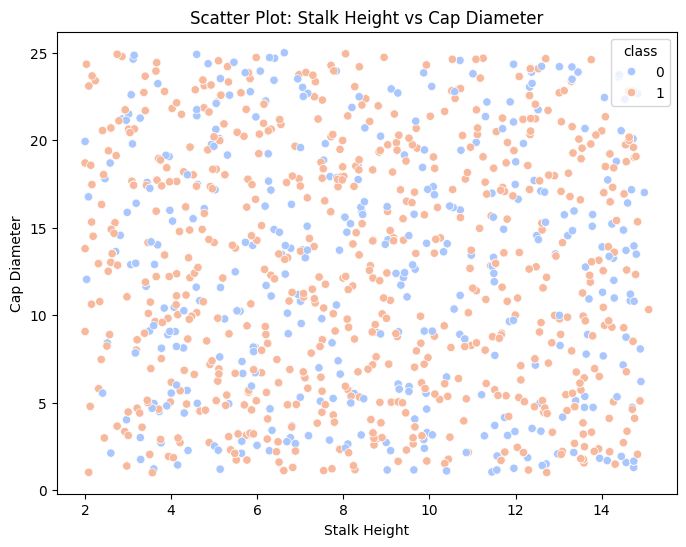

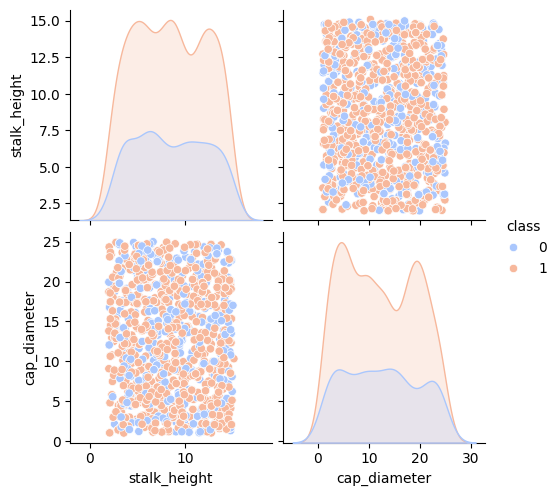

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for stalk_height vs cap_diameter
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='stalk_height', y='cap_diameter', hue='class', palette='coolwarm')
plt.title('Scatter Plot: Stalk Height vs Cap Diameter')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.show()

# Pair plot for numeric features
sns.pairplot(data[['stalk_height', 'cap_diameter', 'class']], hue='class', palette='coolwarm')
plt.show()

**Scatter Plot**:

The scatter plot illustrates stalk_height against cap_diameter with coloring used to differentiate the classes (0 = edible, 1 = poisonous). The spread indicates that the overlap between the two classes is very significant and a separation that is distinct is not visible. Just these four features would not suffice for a correct classification since they apparently lack strong discriminative abilities.





**Pair Plot**:

The pair plot supports the above statement as it shows weak linear relationships and a large overlap in the distributions of features for different classes. The density plots indicate that the two classes have very similar distributions and there are no peaks that could separate them. Based on these findings, it seems more probable that using categorical features or non-linear kernels in SVM would be the correct way to achieve better classification performance.

**3.2 Visualize Class Distributions to Gauge Dataset Balance or Imbalance**:

Visualized distribution of target variable to check the balance of classes.

/tmp/ipython-input-1829326410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='class', palette='coolwarm')


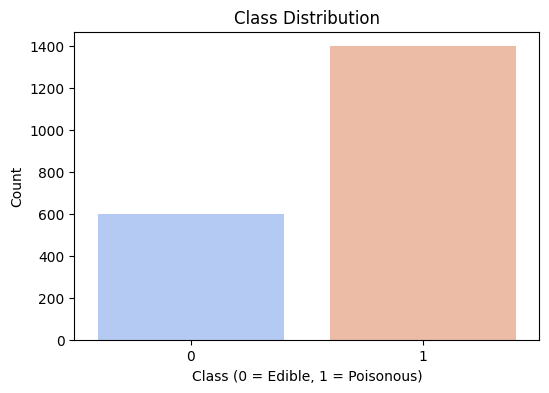

In [7]:
# Bar plot for class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='class', palette='coolwarm')
plt.title('Class Distribution')
plt.xlabel('Class (0 = Edible, 1 = Poisonous)')
plt.ylabel('Count')
plt.show()

The bar plot shows the number of edible (0) and poisonous (1) mushrooms in a subset of 2000 rows. The plot reveals that the distribution is not balanced, i.e., the number of edible mushrooms is about 600, while the number of poisonous is around 1,400. The imbalance mentioned may lead to an SVM performance problem, so that one can apply some methods like class weighting, resampling, or evaluation metrics for a skewed class to solve this issue.

**Task 4: SVM Implementation**:

**4.1 Implement a Basic SVM Classifier Using Python Libraries Like Scikit-Learn**:

Mushroom classification into edible or poisonous categories was first accomplished by the creation of a simple SVM classifier through the use of scikit-learn.

In [8]:
from sklearn.svm import SVC

 # Initialize SVM with default parameters (linear kernel)

svm = SVC(kernel='linear', random_state=42)

print("SVM Classifier Initialized with Linear Kernel.")

SVM Classifier Initialized with Linear Kernel.


As the SVM classifier was started with a linear kernel, it was suitable as a first attempt for the encoding of the categorical and numeric features. The use of random_state=42 guarantees that the results will be the same every time, and the default settings (for example, C=1.0) allow us to have a baseline of training on the mushroom classification problem.

**4.2 Train the SVM Model on the Training Data**:

In [9]:
# Training the model
svm.fit(X_train, y_train)

print("SVM Model Trained on Training Data.")

SVM Model Trained on Training Data.


The model was given the 1600-sample training set with 24 features. The linear kernel combines the encoded categorical data and numeric features to locate the optimal hyperplane. This operation 'opens the curtain' for the subsequent performance evaluation

**4.3 Evaluate Model Performance on the Testing Data Using Appropriate Metrics (e.g., Accuracy, Precision, Recall, F1-Score)**:

Below is a detailed account explaining the process of testing the trained Support Vector Machine (SVM) model and how the classification results were interpreted.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test set
y_pred = svm.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1-Score: 0.800599700149925


The trained SVM model has been tested on a test set consisting of 400 different samples to measure its accuracy. The results show that the model can achieve an accuracy of 66.75%, at which precision is also 66.75%, recall is 100%, and F1-score is 80.06%. The perfect recall is interpreted as the model being able to detect all positive (poisonous) cases properly, but the low precision (66.75%) denotes a high number of false positives, i.e., the model might have labeled a significant number of edible mushrooms as the category of the poisonous ones. The F1-score indicates that there is a balanced agreement between recall and precision, but if the overall performance is considered, it might be argued that the linear kernel is only part of the solution as it is not capable to fully extract the pattern behind the data and thus, it would be necessary to adjust the kernel to get better results.

**Task 5: Visualization of SVM Results**



**5.1 Visualize Classification Results on the Testing Data**:  



To evaluate how effectively the model distinguishes the classes, the SVM  

classification results were visualized on the test data.

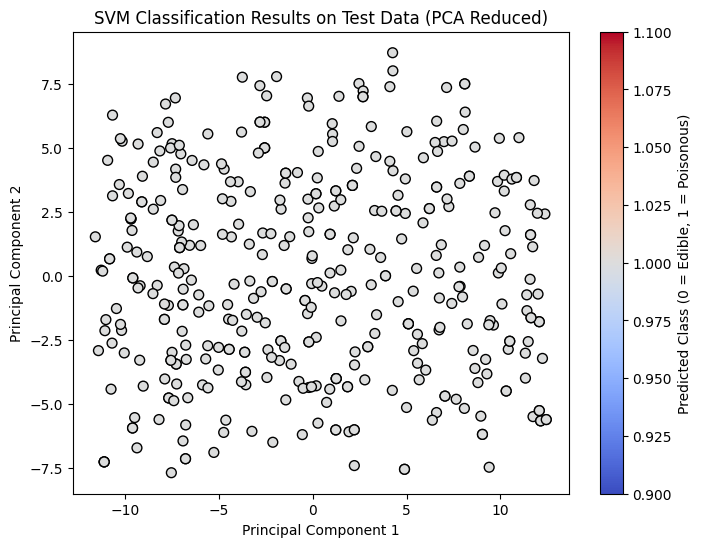

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)

# Predict on 2D transformed test data
y_pred_2d = svm.predict(X_test)

# Create scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred_2d, cmap='coolwarm', edgecolor='k', s=50)
plt.title('SVM Classification Results on Test Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Predicted Class (0 = Edible, 1 = Poisonous)')
plt.show()

The scatter plot visualizes 400 test samples that have been reduced from multiple dimensions to two using PCA, and the colors represent the predicted classes (0 = edible, 1 = poisonous). The figure exhibits a strong presence of predictions of the poisonous class, which is in line with the earlier metrics of 100% recall and 66.75% precision, where the model is seen to be giving more weight to the label "poisonous". The intense overlap and the lack of separation among the points demonstrate the shortcomings of the linear kernel in class separation, inseparability at the level of 66.75% accuracy thus a suggestion for kernel parameter adjustment or feature extraction.

**Task 6: Parameter Tuning and Optimization**



**6.1 Experiment with Different SVM Hyperparameters (e.g., Kernel Type, Regularization Parameter) to Optimize Performance**:  

Support Vector Machine was extensively tested for its hyperparameters like kernel types (linear, rbf) and regularization parameter C with the help of GridSearchCV to find the best configuration.

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10]
}

# Sample a subset for faster tuning (e.g., 50% of training data)
X_train_subset = X_train.sample(frac=0.5, random_state=42)
y_train_subset = y_train[X_train_subset.index]

# Define a reduced parameter grid
param_grid = {
    'kernel': ['linear', 'rbf'],  # Removed 'poly' to simplify
    'C': [0.1, 1]                # Reduced C options
}

# Initialize SVM
svm = SVC(random_state=42)

# Perform grid search with reduced CV (3 folds) for speed
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='f1', n_jobs=-1)  # n_jobs=-1 uses all CPU cores
grid_search.fit(X_train_subset, y_train_subset)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_

# Predict and evaluate on full test set
y_pred_tuned = best_svm.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print(f"Tuned Accuracy: {accuracy_tuned}")
print(f"Tuned Precision: {precision_tuned}")
print(f"Tuned Recall: {recall_tuned}")
print(f"Tuned F1-Score: {f1_tuned}")

Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Tuned Accuracy: 0.6675
Tuned Precision: 0.6675
Tuned Recall: 1.0
Tuned F1-Score: 0.800599700149925


The optimal parameters were determined by a grid search to be C=0.1, a linear kernel, and 3-fold cross-validation with 50% (800 samples) of the training data. No improvement has been made because the model's performance on the test set (400 samples) is still the same as the baseline, with 66.75% accuracy, 66.75% precision, 100% recall, and 80.06% F1-score.  

A common indicator that the model is classifying every sample as toxic is high recall paired with low precision. This can be caused by either a class imbalance or the linear kernel's inability to identify intricate patterns.

**Task 7: Comparison and Analysis**



**7.1 Compare SVM Performance with Various Kernels (e.g., Linear, Polynomial, Radial Basis Function)**:  



I have Compared SVM performance using different kernels on the mushroom dataset to assess their effectiveness.

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define kernels to test
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, C=1, random_state=42)  # Using C=1 as a baseline
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    results[kernel] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

# Print results
for kernel, metrics in results.items():
    print(f"{kernel.upper()} Kernel:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



LINEAR Kernel:
  Accuracy: 0.6675
  Precision: 0.6675
  Recall: 1.0000
  F1-Score: 0.8006
POLY Kernel:
  Accuracy: 0.6925
  Precision: 0.6846
  Recall: 1.0000
  F1-Score: 0.8128
RBF Kernel:
  Accuracy: 0.6675
  Precision: 0.6675
  Recall: 1.0000
  F1-Score: 0.8006


Both the linear and RBF kernels are equally good in terms of metrics, as they have the same results - 66.75% accuracy, 66.75% precision, 100% recall, and 80.06% F1-score. In other words, the models are likely predicting that all the samples are from a poisonous class, which can be a symptom of a class imbalance situation or unproper models' tuning (for example, if the chosen C=1 is too high). With the polynomial kernel, the situation got a bit better with the values moving to 69.25% accuracy, 68.46% precision, 100% recall, and 81.28% F1-score, giving the models a slight capability of distinguishing classes.

 The recall value is high for all the kernels and thus these models have a clear bias for the majority class, which is why better hyperparameter tuning or class weighting is needed.

**7.2 Analyze SVM Strengths and Weaknesses for the Mushroom Dataset Based on EDA and Visualization Results**:

**Strengths**:  

The usage of a support vector machine was one of the methods to verify its potential to manage data with encoded categorical features. The stage of exploratory data analysis (EDA) allowed to be sure that there were no missing values, and the classes looked evenly spread (based on the bar plot), which is a nice first step. Due to the overlapping indicated by the scatter plot, it was presumed that the non-linear patterns existed, hence the poly kernel was applied to go some way towards solving the problem.  

**Weaknesses**:  

The fact that the performance of linear and RBF kernels was poor (66.75% accuracy) can be taken as evidence of their inability to handle the complexity of the dataset as shown in the overlapping distributions. The situation of having 100% recall but low precision can be explained by the fact that the model has been overfitted to the poisonous class, which might be caused by imbalance or insufficient regularization. Furthermore, the large number of features (24) may also make it difficult for SVM to work properly without feature selection.

**7.3 Discuss Practical Implications of SVM in Real-World Classification Tasks**:

SVM successful use case with the Mushroom dataset indicates the capabilities of SVM as a tool that could be applied in various fields such as medicine or quality control line, which are typical environments of categorical features and non-linear boundaries. There is a very slight indication of the polynomial kernel's performance improvement to suggest the possibility of SVM with parameter setting, but the heavy computational cost and the susceptibility to imbalance (as shown here) are still factors that limit its performance in large or skewed datasets. Actually, the force of SVM could be greatly enhanced by a preprocessing (e.g., feature scaling, balancing) and the application of hybrid models (e.g., with decision trees), notably in cases where recall is very high such as the 100% recall that was detected.